In [608]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np


In [2]:
#Import data file into notebook
data = pd.read_csv("../Data/forestfires.csv")

# Forest Fires - Data Analysis 

---

### Introduction. 
<p>Fires happen when ignition (from a lightning strike or a careless bonfire, for example) meets available fuel (such as dry vegetation), and warm, dry air fans the flames.
</p>

<p>That’s why the fire season tends to coincide with high temperatures and dry conditions. In the eastern U.S., fire season lasts from March through May, while the West sees most of its fire activity from June through October. </p>


Fires are an important and necessary part of the lifecycle for many different kinds of ecosystems. For as long as forests and grasslands have grown on earth, fires have burned them. In fact, some tree species, like lodgepole pines and aspens, need fire to stimulate their growth.

Fires have also been used by people as a way to manage lands, whether to clear land for farming, get rid of unwanted pests, or to restore nutrients to the soil.


  1. `X` - x-axis spatial coordinate within the Montesinho park map: 1 to 9 NOTE: potential to change this to lat long?
  2. `Y` - y-axis spatial coordinate within the Montesinho park map: 2 to 9
  3. `month` - month of the year: "jan" to "dec" 
  4. `day` - day of the week: "mon" to "sun"
  5. `FFMC` - FFMC index from the FWI system: 18.7 to 96.20.  https://wikifire.wsl.ch/tiki-index91f7.html?page=Fine+fuel+moisture+code
  6. `DMC` - DMC index from the FWI system: 1.1 to 291.3 https://wikifire.wsl.ch/tiki-index9436.html?page=Duff+moisture+code
  7. `DC` - DC index from the FWI system: 7.9 to 860.6 
  8. `ISI` - ISI index from the FWI system: 0.0 to 56.10
  9. `temp` - temperature in Celsius degrees: 2.2 to 33.30
  10. `RH` - relative humidity in %: 15.0 to 100
  11. `wind` - wind speed in km/h: 0.40 to 9.40 
  12. `rain` - outside rain in mm/m2 : 0.0 to 6.4 
  13. `area` - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform). NOTE: look up my 10 equations book to see if  


In [3]:
data.head()
#

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [35]:
data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

In [4]:
data.shape

(517, 13)

In [12]:
data.info

<bound method DataFrame.info of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [13]:
# Display the object type of data information.

data.describe(include=['O'])

#all months and days are accounted for, which makes sense

month  day
count    517  517
unique    12    7
top      aug  sun
freq     184   95

In [20]:
data.describe()

X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

These numbers appear to be legitimate at first glance, I will look at the individual distributions later

In [21]:
data[data.duplicated()]

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00

Could it be that in the case of the small fires, there were simply two small fires recorded in the same area under the same conditions?

In [18]:
duplicates = data[data.duplicated(keep=False)]

In [19]:
duplicates

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
52   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
53   4  3   aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   0.00
99   3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
100  3  4   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   0.00
214  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
215  4  4   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  28.66
302  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00
303  3  6   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   0.00

No, the fact that they are sequential and exactly the same, even if the areas are large leads me to beleive the duplicates are errors in data entry

In [22]:
data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]

In [23]:
clean_data = data.drop_duplicates()

https://nycdatascience.com/blog/student-works/data-analysis-of-forest-fire-montesinho-natural-park/

From this website I found that the date range for this data is January 2000 to December 2003

In [28]:
start_date='2000-01-01'
end_date='2003-12-31'
date_range=pd.date_range(start=start_date,end=end_date)

In [29]:
date_range

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2003-12-22', '2003-12-23', '2003-12-24', '2003-12-25',
               '2003-12-26', '2003-12-27', '2003-12-28', '2003-12-29',
               '2003-12-30', '2003-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')

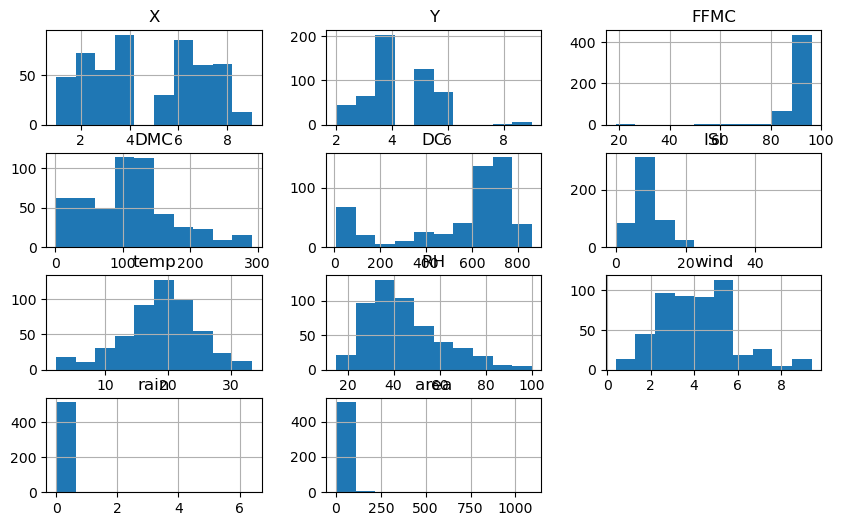

In [32]:
# Create histograms for all numerical columns
data.hist(figsize=(10, 6))  # figsize is optional, adjust as needed
plt.show()

(array([429.,  30.,  20.,  10.,   6.,   4.,   3.,   2.,   2.,   2.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   0.    ,   10.9084,   21.8168,   32.7252,   43.6336,   54.542 ,
          65.4504,   76.3588,   87.2672,   98.1756,  109.084 ,  119.9924,
         130.9008,  141.8092,  152.7176,  163.626 ,  174.5344,  185.4428,
         196.3512,  207.2596,  218.168 ,  229.0764,  239.9848,  250.8932,
         261.8016,  27

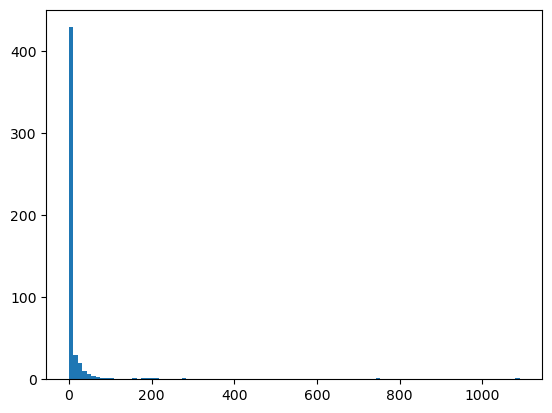

In [34]:
plt.hist(data['area'], bins=100)

Very skewed distribution, but I'm not sure removing zeros is the best solution, as a zero burned hectares likely means a small area was on fire but a forest fire did not occur. Zero area fires could be filtered out or classified as something else.

Making a new columns with numerical days and months as well as a date column

In [36]:
day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}


In [38]:
clean_data['month_num']=clean_data['month'].map(month_mapping)
clean_data['day_num']=clean_data['day'].map(day_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_15096\1388035913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['month_num']=clean_data['month'].map(month_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_15096\1388035913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['day_num']=clean_data['day'].map(day_mapping)


In [39]:
clean_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num  
0            3        4  
1           10        1  
2           10        5  
3            3        4  
4            3        6  
..         ...      ...  
512          8        6  
513          8        6  
514          8        6  
515          8        5  
516         11        1  

[513 rows x 15 columns]

In [40]:
clean_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num  
0            3        4  
1           10        1  
2           10        5  
3            3        4  
4            3        6  
..         ...      ...  
512          8        6  
513          8        6  
514          8        6  
515          8        5  
516         11        1  

[513 rows x 15 columns]

In [41]:
numerical_clean_data = clean_data.select_dtypes(include=['number'])

In [42]:
numerical_clean_data.info

<bound method DataFrame.info of      X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_num  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          3   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         10   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         10   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          3   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          3   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          8   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          8   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          8   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          8   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         11   

     day_num  
0   

In [43]:
numerical_clean_data.describe

<bound method NDFrame.describe of      X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_num  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          3   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         10   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         10   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          3   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          3   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          8   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          8   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          8   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          8   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         11   

     day_num  
0 

In [44]:
numerical_clean_data.dtypes

X              int64
Y              int64
FFMC         float64
DMC          float64
DC           float64
ISI          float64
temp         float64
RH             int64
wind         float64
rain         float64
area         float64
month_num      int64
day_num        int64
dtype: object

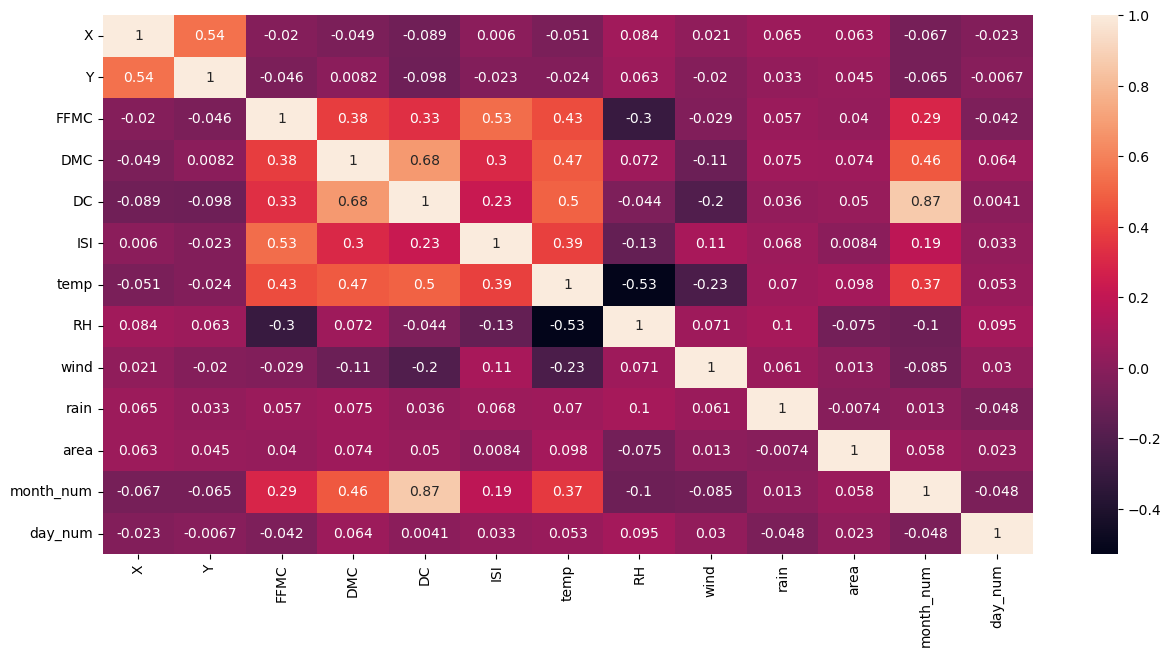

In [49]:
#Relationship analysis
#correlation analysis

#Another way to make the heatmap
sns.heatmap(numerical_clean_data.corr(), annot = True) 
plt.rcParams['figure.figsize'] = (8, 4) #can change these numbers here

In [82]:
numerical_clean_data

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_num  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          3   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         10   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         10   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          3   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          3   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          8   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          8   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          8   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          8   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         11   

     day_num  
0          4  
1          1  
2          5  
3          4  
4          6  
..       ...  
512        6  
513        6  
514        6  
515        5  
516        1  

[513 rows x 13 columns]

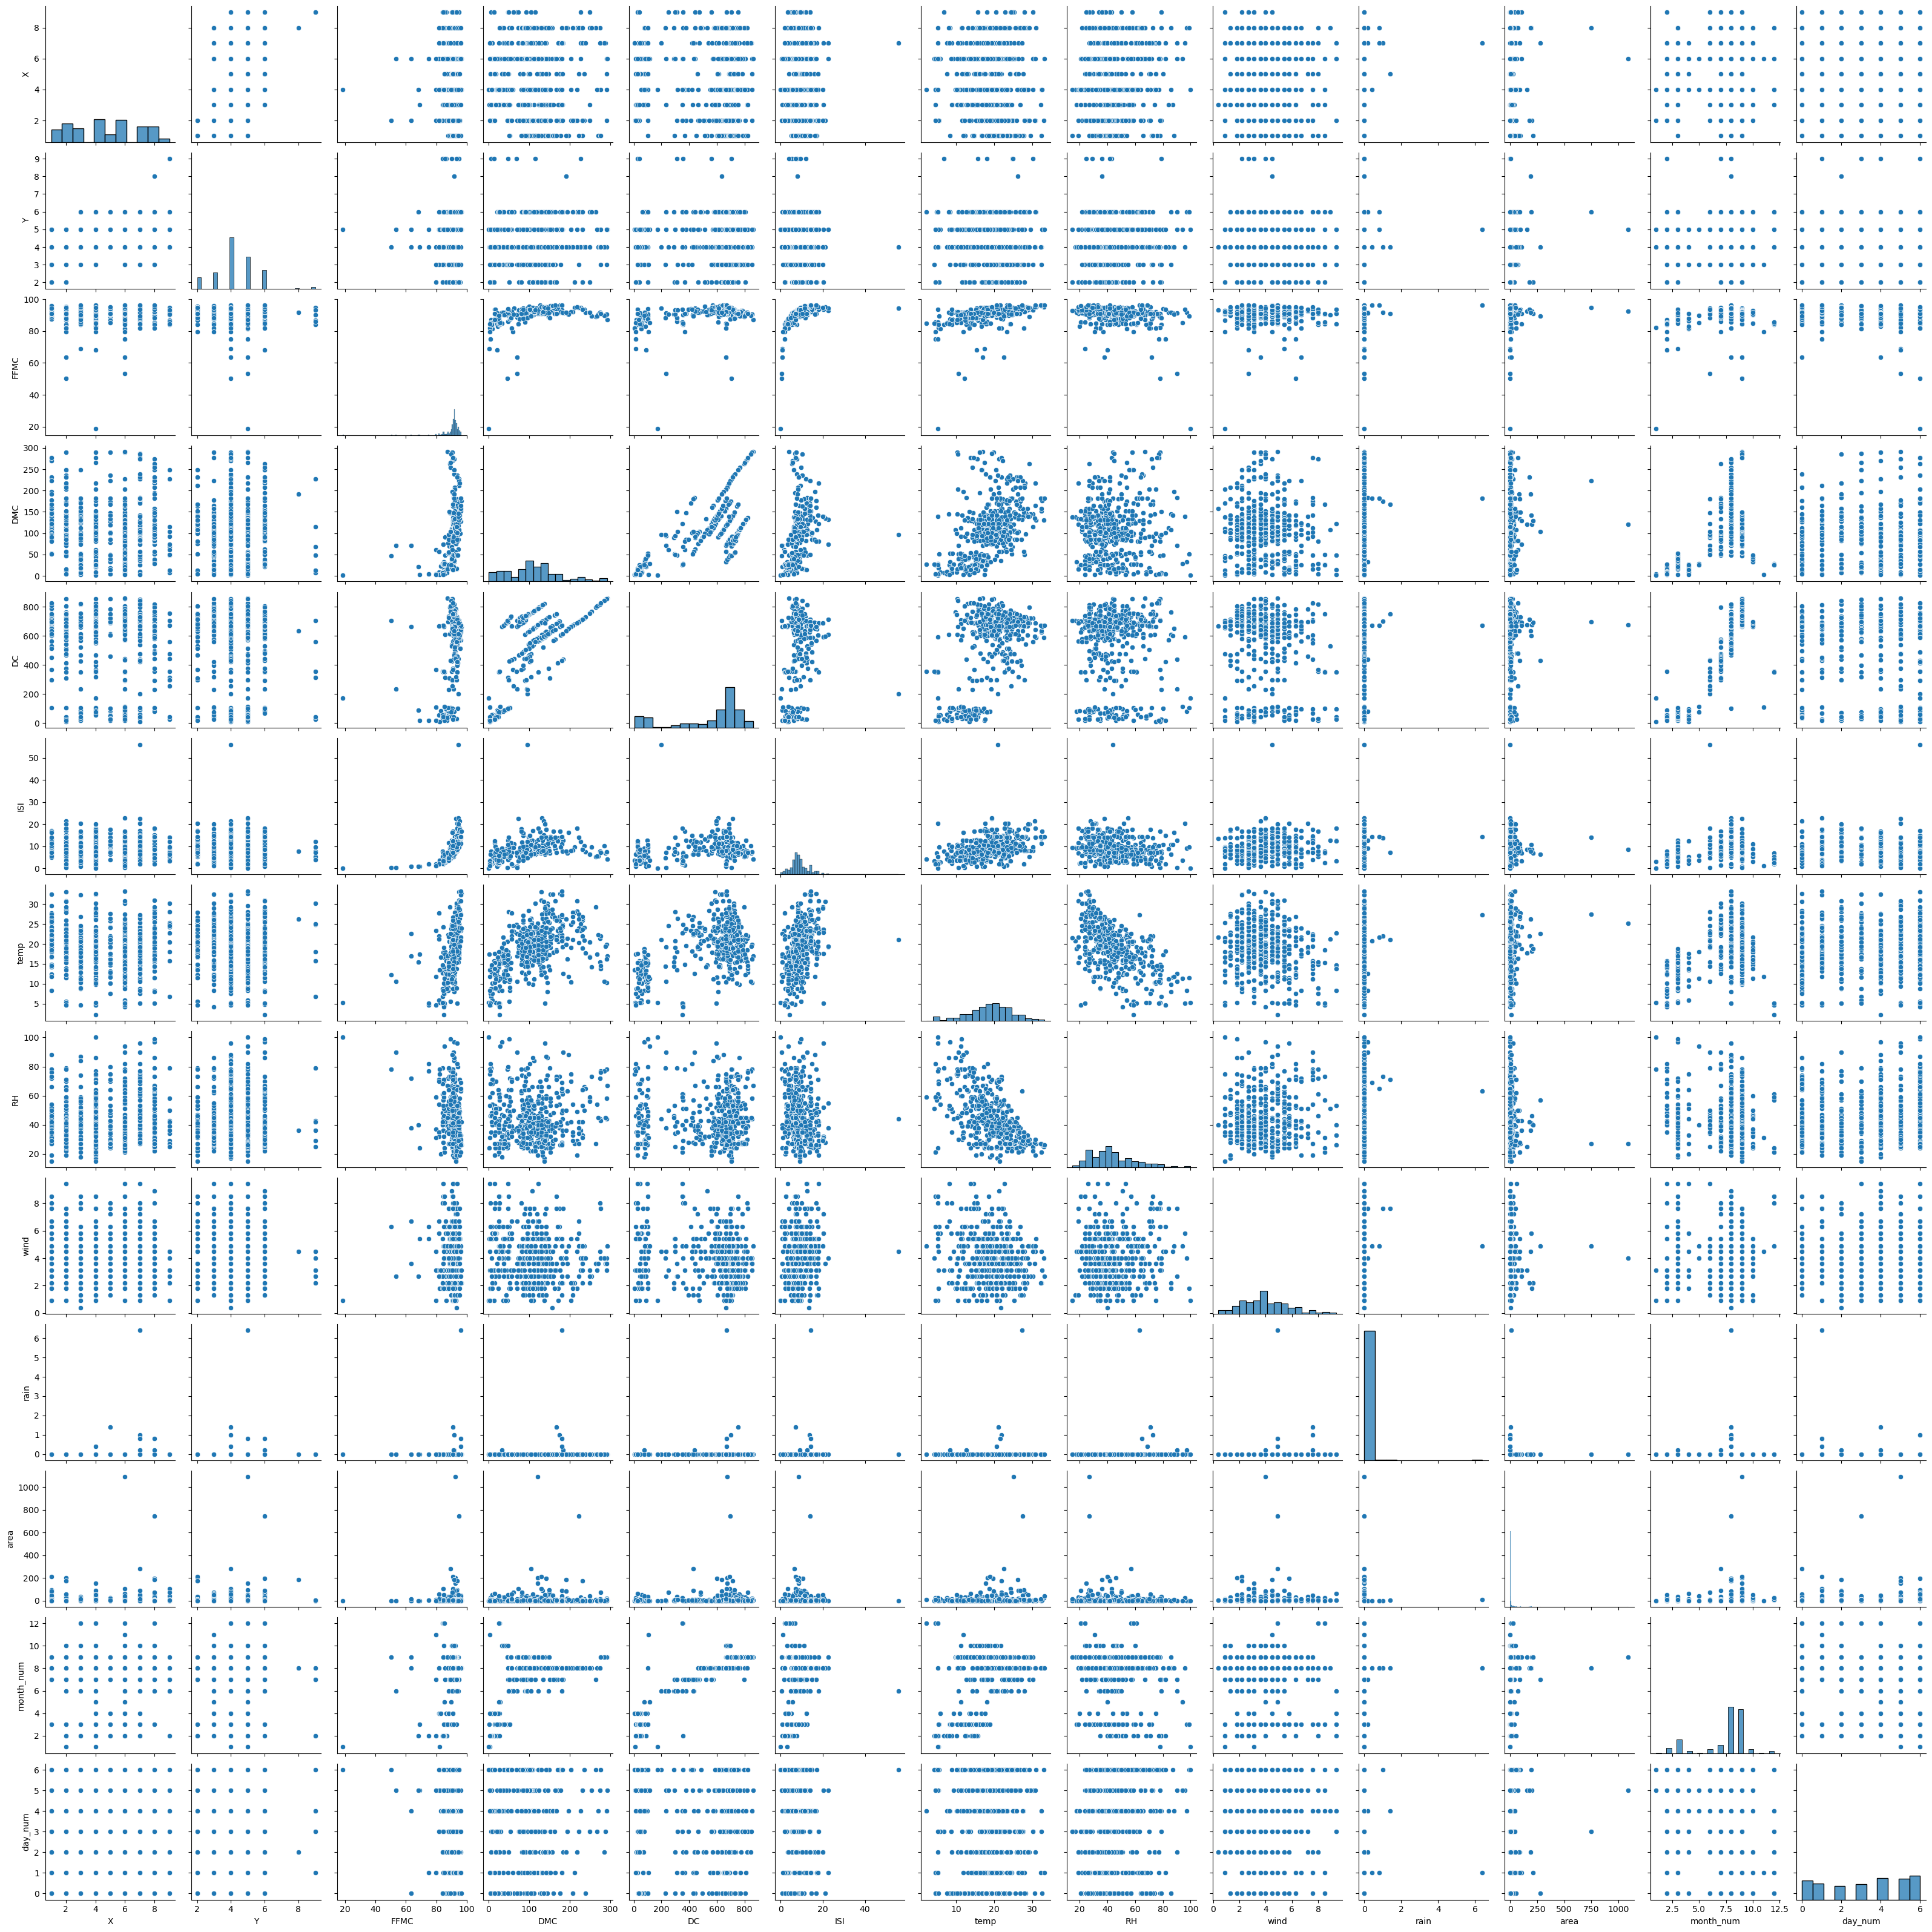

In [81]:
sns.pairplot(numerical_clean_data)

<Axes: ylabel='Count'>

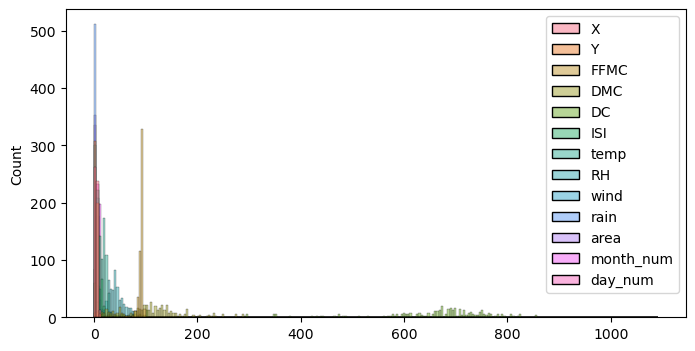

In [86]:
#Make seperate histograms to see distribution
sns.histplot(numerical_clean_data)  #can make bins

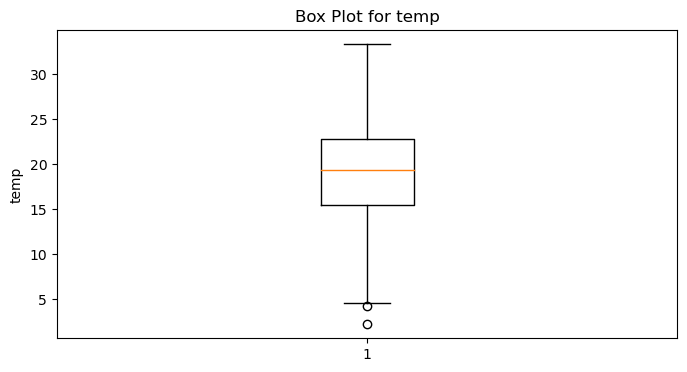

In [88]:
#look for outliers
plt.boxplot(numerical_clean_data['temp'])
plt.ylabel('temp')
plt.title('Box Plot for temp')
plt.show()

In [ ]:
#look for outliers
plt.boxplot(numerical_clean_data['day_num'])
plt.ylabel('days')
plt.title('Box Plot for days')
plt.show()

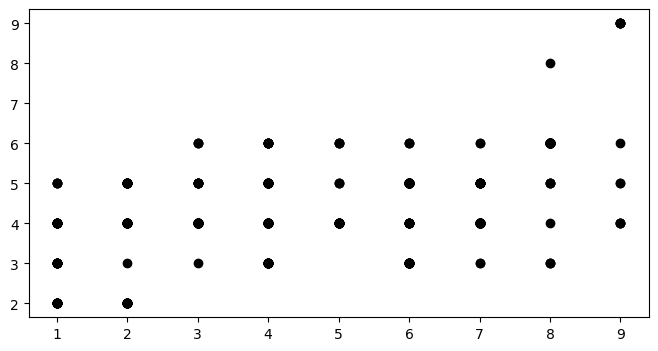

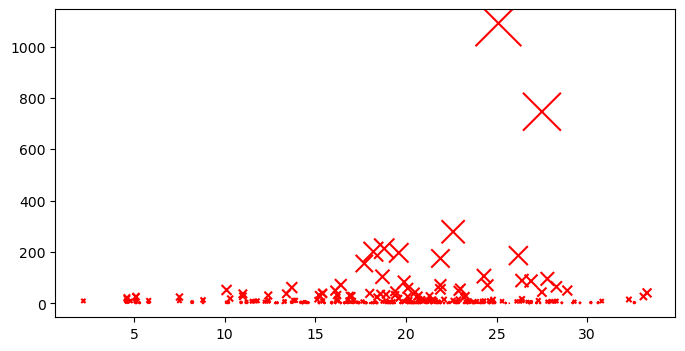

In [96]:
x=numerical_clean_data['temp']
y=numerical_clean_data['area']
area=numerical_clean_data['area']
plt.scatter(x, y, label='Map', color='red', marker='x',s=area)

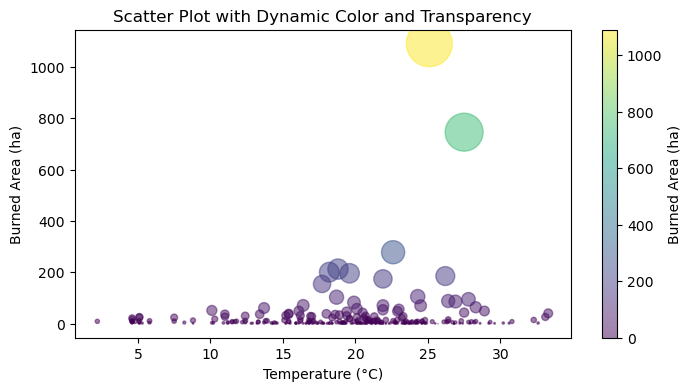

In [98]:
x=numerical_clean_data['temp']
y=numerical_clean_data['area']

plt.scatter(x, y, label='Map', c=area, cmap='viridis', alpha=0.5, marker='o',s=area)

# Add axis labels
plt.xlabel('Temperature (°C)')
plt.ylabel('Burned Area (ha)')

# Add a colorbar for reference
plt.colorbar(label='Burned Area (ha)')

# Add a title
plt.title('Scatter Plot with Dynamic Color and Transparency')

# Display the plot
plt.show()

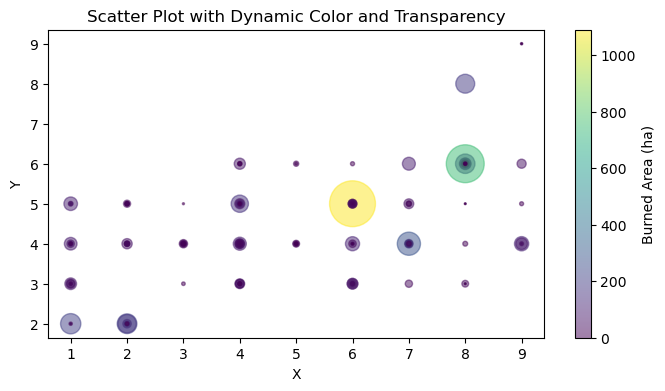

In [173]:
#look at "map"

x=numerical_clean_data['X']
y=numerical_clean_data['Y']
plt.scatter(x, y, label='Map', c=area, cmap='viridis', alpha=0.5, marker='o',s=area)

# Add axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Add a colorbar for reference
plt.colorbar(label='Burned Area (ha)')

# Add a title
plt.title('Scatter Plot with Dynamic Color and Transparency')

# Display the plot
plt.show()

In [100]:
by_region=numerical_clean_data.groupby(['X', 'Y'])

In [102]:
by_region['month_num'].count()

X  Y
1  2    19
   3    10
   4    15
   5     4
2  2    25
   3     1
   4    27
   5    20
3  3     1
   4    42
   5     7
   6     3
4  3    21
   4    35
   5    25
   6     8
5  4    23
   5     3
   6     4
6  3    25
   4     9
   5    49
   6     3
7  3     2
   4    45
   5    11
   6     2
8  3     3
   4     1
   5     4
   6    52
   8     1
9  4     4
   5     2
   6     1
   9     6
Name: month_num, dtype: int64

In [189]:
'initial fire > 0', 'initial fire =0', 'odds fire spreads', 'logistic regression fire spreads', 'fire spread? 0/1'

('initial fire > 0',
 'initial fire =0',
 'odds fire spreads',
 'logistic regression fire spreads',
 'fire spread? 0/1')

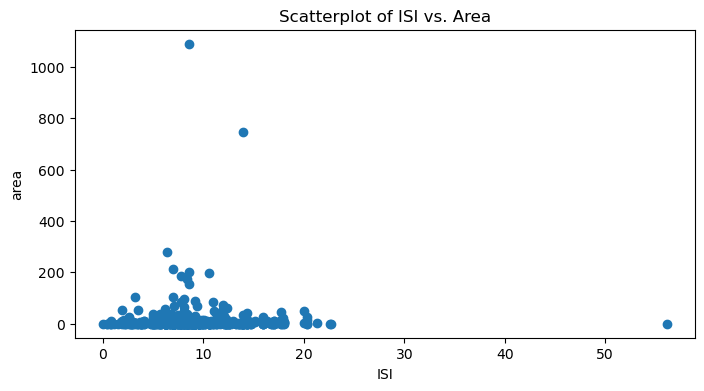

In [199]:
numerical_clean_data[['ISI', 'area']]
x = numerical_clean_data['ISI']
y = numerical_clean_data['area']

plt.scatter(x, y)
plt.xlabel('ISI')
plt.ylabel('area')
plt.title('Scatterplot of ISI vs. Area')
plt.show()

In [119]:
count_zero = numerical_clean_data['area'].value_counts()[0]
count_spread=(numerical_clean_data['area']>0).sum()

In [120]:
print(count_zero)
print(count_spread)

244
269


In [121]:
by_month=numerical_clean_data.groupby(['month_num'])

In [141]:
by_month['area'].sum()


month_num
1        0.00
2      125.50
3      206.60
4       80.02
5       38.48
6       99.30
7      459.83
8     2297.99
9     3086.13
10      99.57
11       0.00
12     119.97
Name: area, dtype: float64

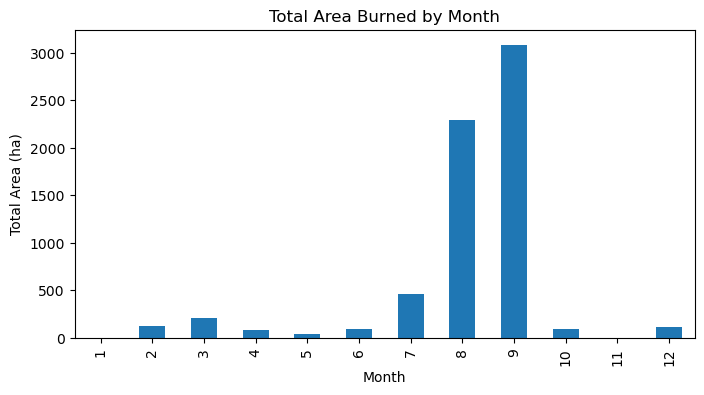

In [147]:
area_burned_by_month = by_month['area'].sum()


area_burned_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Total Area (ha)')
plt.title('Total Area Burned by Month')


plt.show()

In [396]:
by_month['area'].mean()

month_num
1      0.000000
2      6.275000
3      3.898113
4      8.891111
5     19.240000
6      6.206250
7     14.369687
8     12.626319
9     17.942616
10     6.638000
11     0.000000
12    13.330000
Name: area, dtype: float64

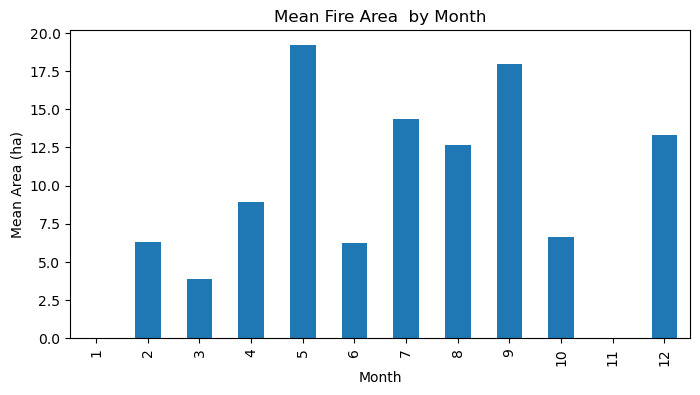

In [400]:
avg_area_by_month = by_month['area'].mean()


avg_area_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Mean Area (ha)')
plt.title('Mean Fire Area  by Month')


plt.show()

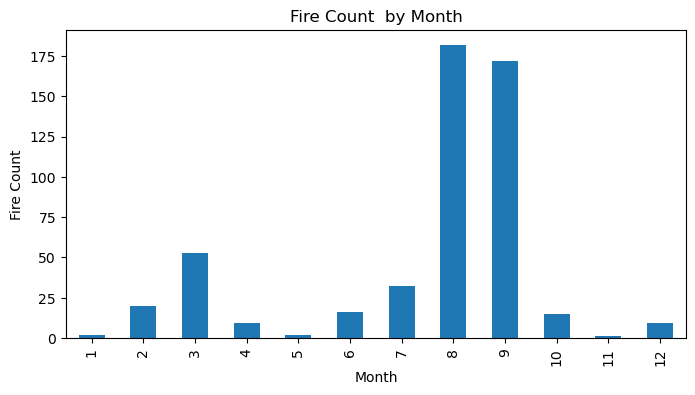

In [402]:
count_area_by_month = by_month['area'].count()


count_area_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.title('Fire Count  by Month')


plt.show()

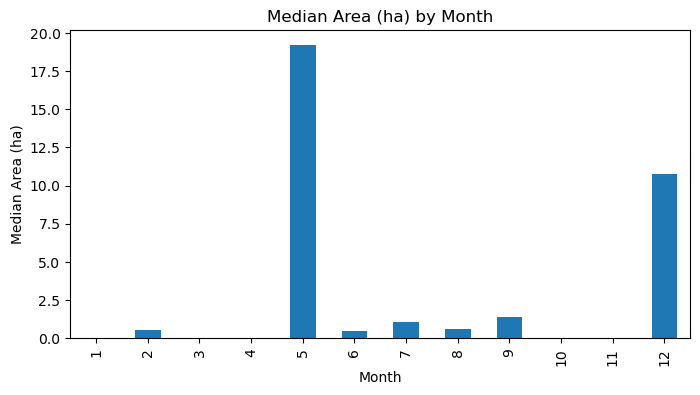

In [405]:
median_area_by_month = by_month['area'].median()


median_area_by_month.plot(kind='bar')


plt.xlabel('Month')
plt.ylabel('Median Area (ha)')
plt.title('Median Area (ha) by Month')


plt.show()

Text(0.5, 0.98, 'Area (ha) by month')

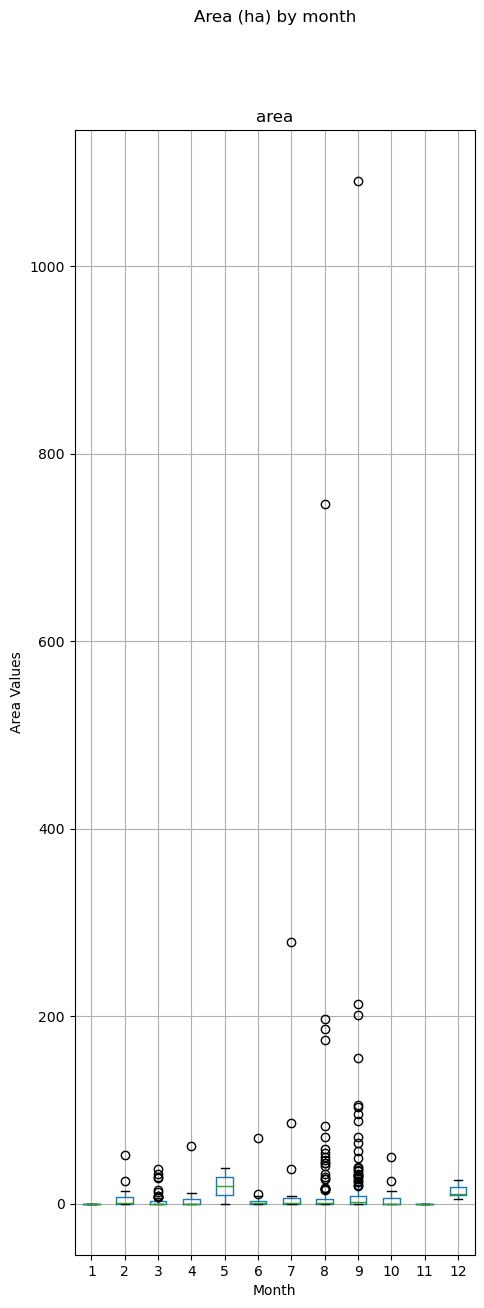

In [465]:
boxplot=numerical_clean_data.boxplot(column='area',by='month_num', figsize=(5, 15))

plt.xlabel('Month')
plt.ylabel('Area Values')
plt.suptitle('Area (ha) by month')


        

ValueError: boxplot is not a valid plot kind

In [148]:
count_zero_by_month = numerical_clean_data['area'].eq().groupby(numerical_clean_data['month_num']).sum()


In [149]:
count_zero_by_month

month_num
1      2
2     10
3     35
4      5
5      1
6      8
7     14
8     83
9     75
10    10
11     1
12     0
Name: area, dtype: int64

In [150]:
count_spread_by_month=numerical_clean_data['area'].gt(0).groupby(numerical_clean_data['month_num']).sum()

In [151]:
count_spread_by_month

month_num
1      0
2     10
3     18
4      4
5      1
6      8
7     18
8     99
9     97
10     5
11     0
12     9
Name: area, dtype: int64

In [165]:
spread_count_comparison=pd.concat([count_zero_by_month, count_spread_by_month], axis=1, keys=['zero_count', 'spread_count'])

In [166]:
spread_count_comparison=spread_count_comparison.reset_index()

In [167]:
spread_count_comparison

month_num  zero_count  spread_count
0           1           2             0
1           2          10            10
2           3          35            18
3           4           5             4
4           5           1             1
5           6           8             8
6           7          14            18
7           8          83            99
8           9          75            97
9          10          10             5
10         11           1             0
11         12           0             9

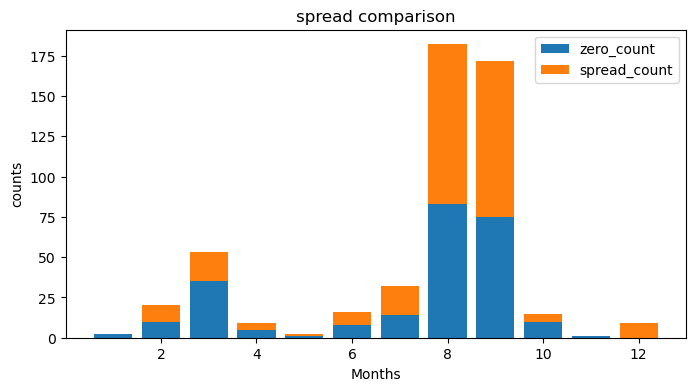

In [169]:
categories=spread_count_comparison['month_num']

plt.bar(categories, spread_count_comparison['zero_count'], label='zero_count')

# Create the second set of bars, stacked on top of the first set
plt.bar(categories, spread_count_comparison['spread_count'], bottom=spread_count_comparison['zero_count'], label='spread_count')

# Add labels, a legend, and a title
plt.xlabel('Months')
plt.ylabel('counts')
plt.title('spread comparison')
plt.legend()

# Show the plot
plt.show()

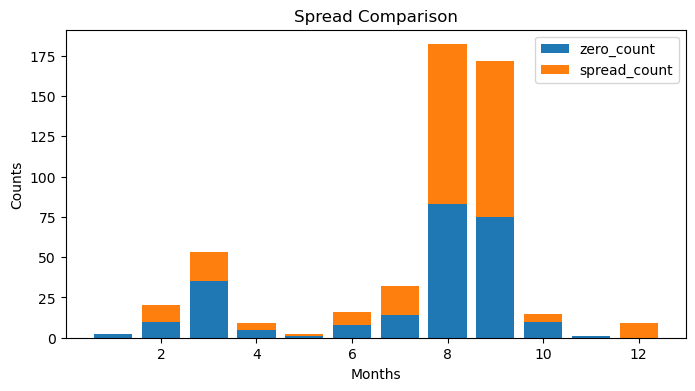

In [602]:


# Define categories and data
categories = spread_count_comparison['month_num']
zero_count = spread_count_comparison['zero_count']
spread_count = spread_count_comparison['spread_count']

# Create the first set of bars
plt.bar(categories, zero_count, label='zero_count')

# Create the second set of bars, stacked on top of the first set
plt.bar(categories, spread_count, bottom=zero_count, label='spread_count')

# Add labels, a legend, and a title
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Spread Comparison')
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='month_num', ylabel='spread_count'>

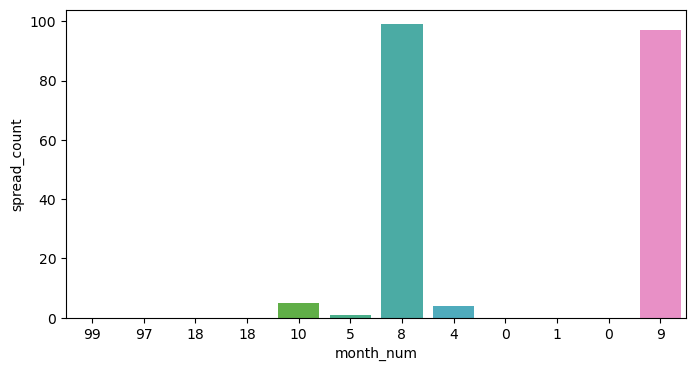

In [174]:
spread_count_comparison['spread_ratio']=spread_count_comparison['spread_count']/(spread_count_comparison['zero_count']+spread_count_comparison['spread_count'])

In [175]:
spread_count_comparison

month_num  zero_count  spread_count  spread_ratio
0           1           2             0      0.000000
1           2          10            10      0.500000
2           3          35            18      0.339623
3           4           5             4      0.444444
4           5           1             1      0.500000
5           6           8             8      0.500000
6           7          14            18      0.562500
7           8          83            99      0.543956
8           9          75            97      0.563953
9          10          10             5      0.333333
10         11           1             0      0.000000
11         12           0             9      1.000000

<BarContainer object of 12 artists>

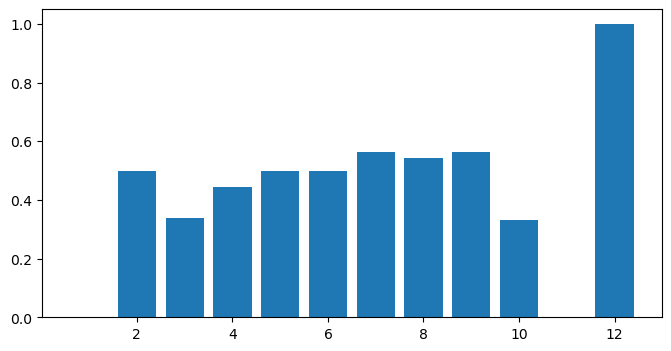

In [176]:
plt.bar(categories, spread_count_comparison['spread_ratio'], label='spread_ratio')

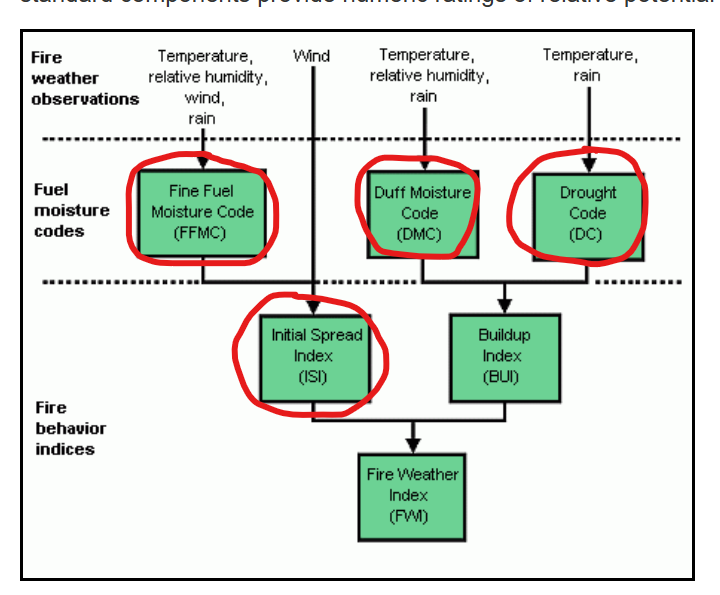


<Axes: xlabel='month_num'>

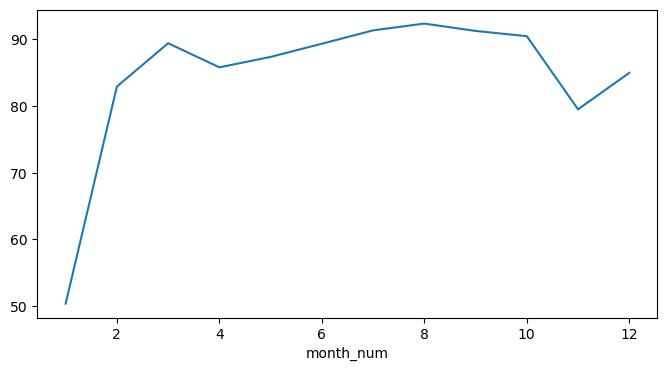

In [181]:
by_month['FFMC'].mean().plot()

NameError: name 'plot' is not defined

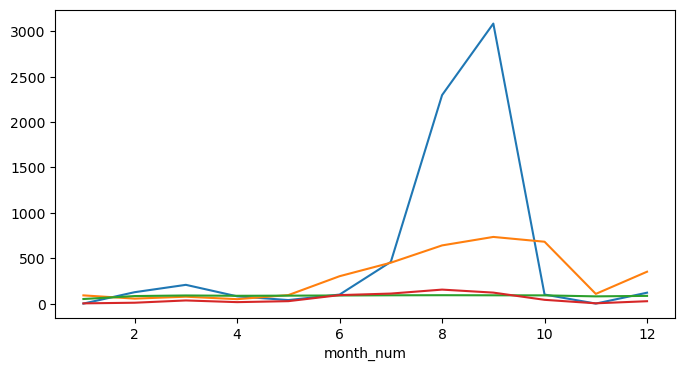

In [217]:
by_month['area'].sum().plot()
by_month['DC'].mean().plot()
by_month['FFMC'].mean().plot()
by_month['DMC'].mean().plot()
plot.show()

<Axes: xlabel='month_num'>

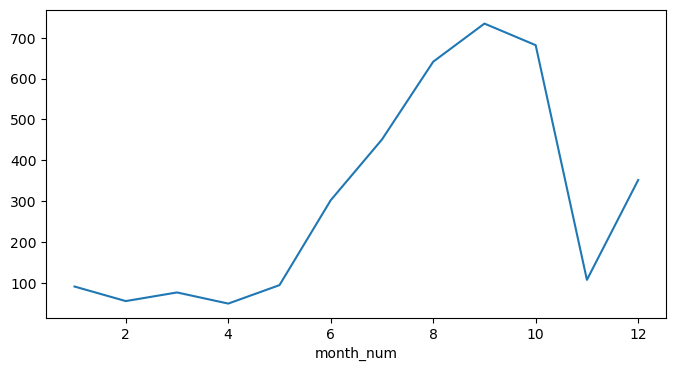

In [596]:
by_month['DC'].mean().plot()

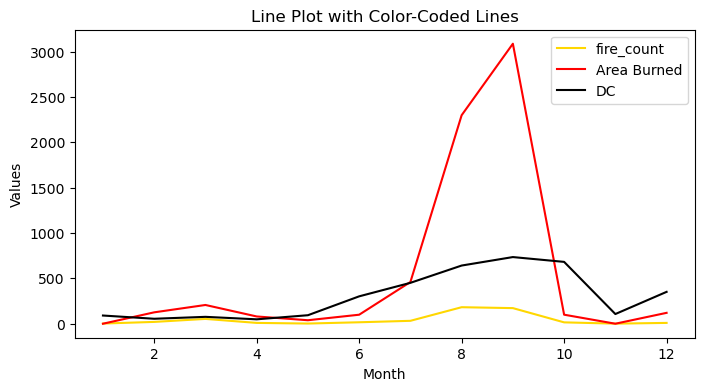

In [204]:
by_month['area'].count().plot(label='fire_count', color='gold')
by_month['area'].sum().plot(label='Area Burned', color='red')
by_month['DC'].mean().plot(label='DC', color='black')

# Add labels and a legend
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Line Plot with Color-Coded Lines')
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='month_num'>

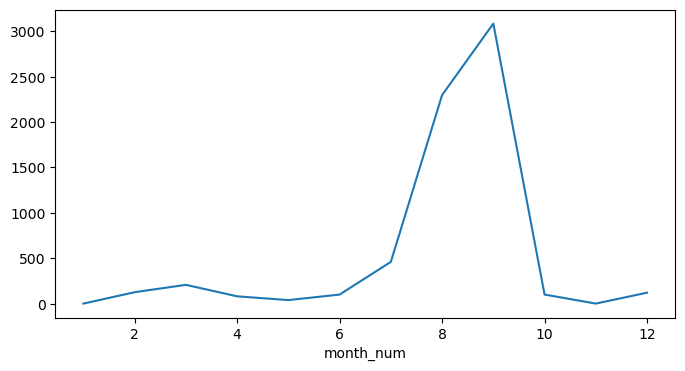

In [215]:


by_month['area'].sum().plot()


In [216]:
by_month['ISI'].mean().plot()

<Axes: xlabel='month_num'>

Drought Code
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.

<Axes: xlabel='month_num'>

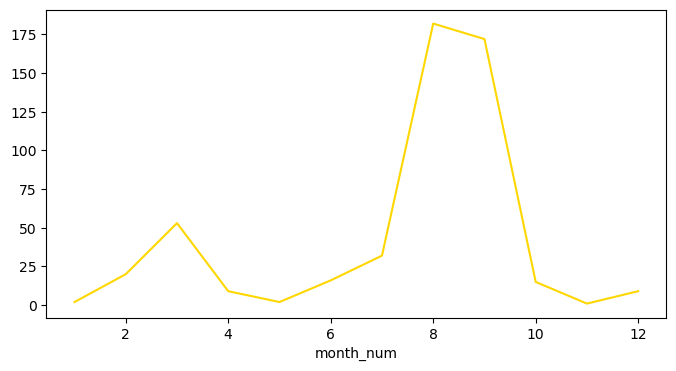

In [221]:
by_month['area'].count().plot(label='fire_count', color='gold')


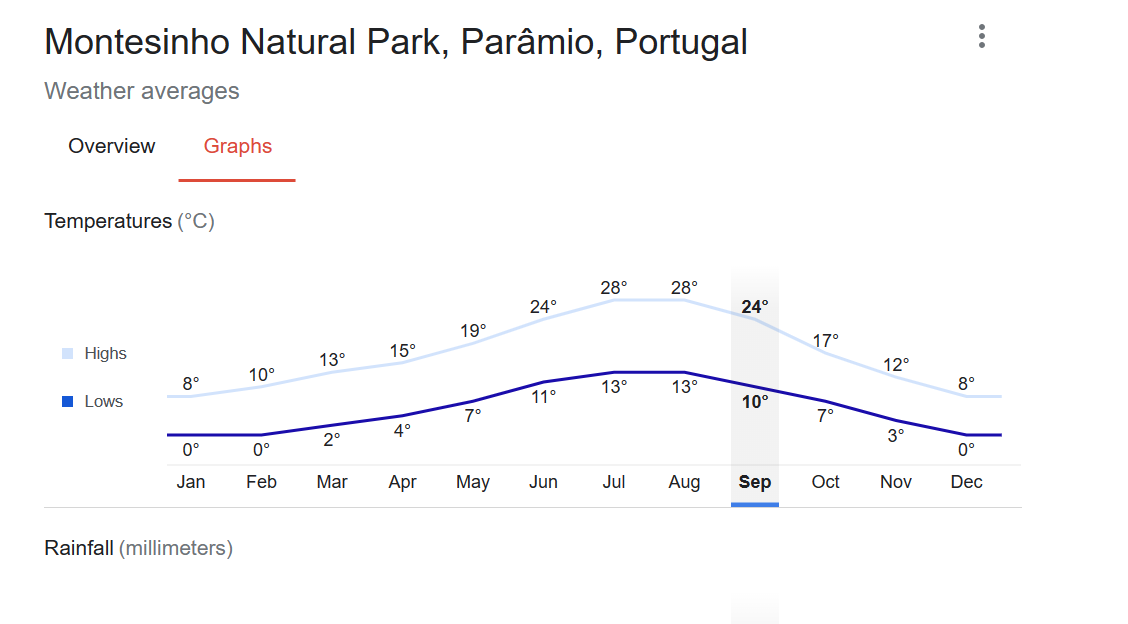


In [220]:
plt.hist2d(numerical_clean_data.X, numerical_clean_data.Y, cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

<Axes: >

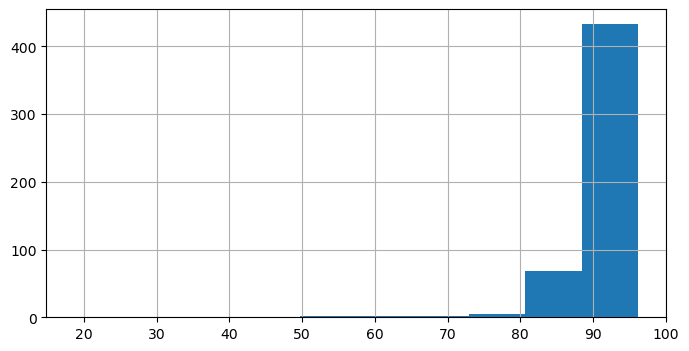

In [224]:
numerical_clean_data['FFMC'].hist()

In [226]:
numerical_clean_data['FFMC'].min()

18.7

In [229]:
bins = [0,10, 20, 30, 40, 50, 60,70,80,90,100]

numerical_clean_data['FFMC_bins'] = pd.cut(numerical_clean_data['FFMC'], bins=bins)

In [228]:
numerical_clean_data

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_num  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          3   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         10   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         10   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          3   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          3   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          8   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          8   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          8   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          8   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         11   

     day_num  FFMC_bins  
0          4   (80, 90]  
1          1  (90, 100]  
2          5  (90, 100]  
3          4  (90, 100]  
4          6   (80, 90]  
..       ...        ...  
512        6   (80, 90]  
513        6   (80, 90]  
514        6   (80, 90]  
515        5  (90, 100]  
516        1   (70, 80]  

[513 rows x 14 columns]

In [314]:
groupedby_FFMCbins = numerical_clean_data.groupby('FFMC_bins').agg({'FFMC': ['count', 'mean'],'area':['sum', 'mean']})

groupedby_FFMCbins

FFMC                area           
          count       mean      sum       mean
FFMC_bins                                     
(0, 10]       0        NaN     0.00        NaN
(10, 20]      1  18.700000     0.00   0.000000
(20, 30]      0        NaN     0.00        NaN
(30, 40]      0        NaN     0.00        NaN
(40, 50]      0        NaN     0.00        NaN
(50, 60]      2  51.900000     0.00   0.000000
(60, 70]      4  66.050000    11.32   2.830000
(70, 80]      5  77.740000    14.37   2.874000
(80, 90]     96  86.598958   934.76   9.737083
(90, 100]   405  92.365679  5652.94  13.957877

In [317]:
groupedby_FFMCbins=groupedby_FFMCbins.dropna()


In [318]:
groupedby_FFMCbins

FFMC                area           
          count       mean      sum       mean
FFMC_bins                                     
(10, 20]      1  18.700000     0.00   0.000000
(50, 60]      2  51.900000     0.00   0.000000
(60, 70]      4  66.050000    11.32   2.830000
(70, 80]      5  77.740000    14.37   2.874000
(80, 90]     96  86.598958   934.76   9.737083
(90, 100]   405  92.365679  5652.94  13.957877

#dropping the first row as there I should only add FFMC values between the min of 18 and the max otherwise I would be assuming that conditions existed that may never have, even if there were no fires

In [247]:
groupedby_FFMCbins.drop(1, inplace=True)

In [319]:
groupedby_FFMCbins.reset_index(inplace=True)

In [320]:
groupedby_FFMCbins

FFMC_bins  FFMC                area           
             count       mean      sum       mean
0   (10, 20]     1  18.700000     0.00   0.000000
1   (50, 60]     2  51.900000     0.00   0.000000
2   (60, 70]     4  66.050000    11.32   2.830000
3   (70, 80]     5  77.740000    14.37   2.874000
4   (80, 90]    96  86.598958   934.76   9.737083
5  (90, 100]   405  92.365679  5652.94  13.957877

In [312]:
groupedby_FFMCbins.corr()['area_sum']

C:\Users\user\AppData\Local\Temp\ipykernel_15096\1152540208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupedby_FFMCbins.corr()['area_sum']


FFMC_count    0.997557
FFMC_mean     0.594822
area_sum      1.000000
Name: area_sum, dtype: float64

In [261]:
groupedby_FFMCbins.columns.get_level_values(0)

Index(['FFMC_bins', 'FFMC', 'FFMC', 'area'], dtype='object')

In [262]:
groupedby_FFMCbins.columns.get_level_values(1)

Index(['', 'count', 'mean', 'sum'], dtype='object')

In [321]:
groupedby_FFMCbins.columns=groupedby_FFMCbins.columns.map('_'.join)

In [322]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum  area_mean
0   (10, 20]           1  18.700000      0.00   0.000000
1   (50, 60]           2  51.900000      0.00   0.000000
2   (60, 70]           4  66.050000     11.32   2.830000
3   (70, 80]           5  77.740000     14.37   2.874000
4   (80, 90]          96  86.598958    934.76   9.737083
5  (90, 100]         405  92.365679   5652.94  13.957877

In [275]:
groupedby_FFMCbins['FFMC_mean'][groupedby_FFMCbins['FFMC_mean']==0]=groupedby_FFMCbins['FFMC_bins_'][groupedby_FFMCbins['FFMC_mean']==0]

1    0.0
2    0.0
3    0.0
Name: FFMC_mean, dtype: float64

In [300]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum
0   (10, 20]           1  18.700000      0.00
1   (20, 30]           0   0.000000      0.00
2   (30, 40]           0   0.000000      0.00
3   (40, 50]           0   0.000000      0.00
4   (50, 60]           2  51.900000      0.00
5   (60, 70]           4  66.050000     11.32
6   (70, 80]           5  77.740000     14.37
7   (80, 90]          96  86.598958    934.76
8  (90, 100]         405  92.365679   5652.94

In [305]:
groupedby_FFMCbins.at[1, 'FFMC_mean']=25
groupedby_FFMCbins.at[2, 'FFMC_mean']=35
groupedby_FFMCbins.at[3, 'FFMC_mean']=45


In [306]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum
0   (10, 20]           1  18.700000      0.00
1   (20, 30]           0  25.000000      0.00
2   (30, 40]           0  35.000000      0.00
3   (40, 50]           0  45.000000      0.00
4   (50, 60]           2  51.900000      0.00
5   (60, 70]           4  66.050000     11.32
6   (70, 80]           5  77.740000     14.37
7   (80, 90]          96  86.598958    934.76
8  (90, 100]         405  92.365679   5652.94

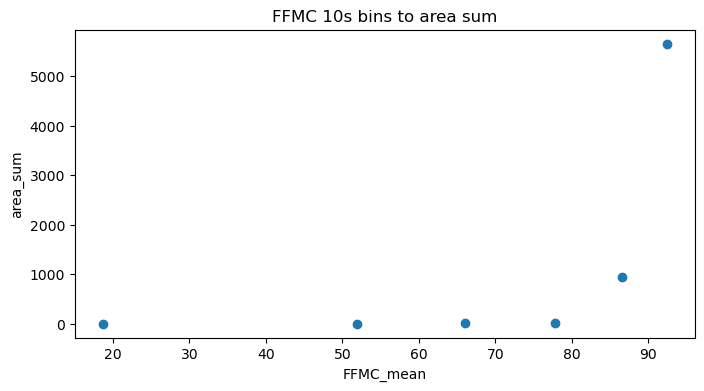

In [330]:
# Add labels and title
plt.scatter(groupedby_FFMCbins['FFMC_mean'],groupedby_FFMCbins['area_sum'])
plt.xlabel('FFMC_mean')
plt.ylabel('area_sum')
plt.title('FFMC 10s bins to area sum')

# Show the plot
plt.show()

In [308]:
groupedby_FFMCbins

FFMC_bins_  FFMC_count  FFMC_mean  area_sum
0   (10, 20]           1  18.700000      0.00
1   (20, 30]           0  25.000000      0.00
2   (30, 40]           0  35.000000      0.00
3   (40, 50]           0  45.000000      0.00
4   (50, 60]           2  51.900000      0.00
5   (60, 70]           4  66.050000     11.32
6   (70, 80]           5  77.740000     14.37
7   (80, 90]          96  86.598958    934.76
8  (90, 100]         405  92.365679   5652.94

In [328]:
sns.regplot(x=groupedby_FFMCbins['FFMC_mean'], y=groupedby_FFMCbins['area_mean'], ci=None)

# Add labels and a title
plt.xlabel('FFMC_bins_')
plt.ylabel('area_mean')
plt.title('FFMC_bins_ to area_mean with Linear Regression Line')

# Show the plot
plt.grid(True)
plt.show()


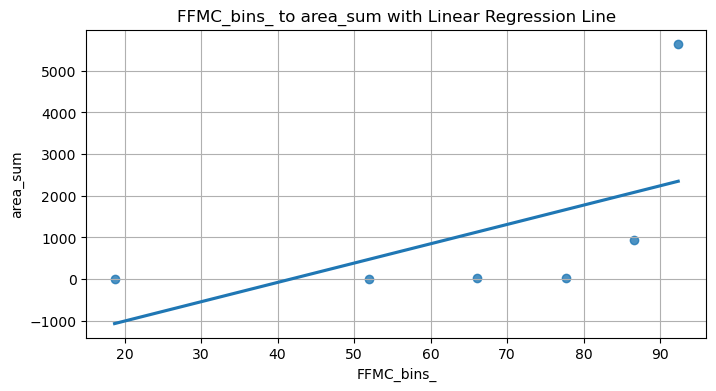

In [329]:
sns.regplot(x=groupedby_FFMCbins['FFMC_mean'], y=groupedby_FFMCbins['area_sum'], ci=None)

# Add labels and a title
plt.xlabel('FFMC_bins_')
plt.ylabel('area_sum')
plt.title('FFMC_bins_ to area_sum with Linear Regression Line')

# Show the plot
plt.grid(True)
plt.show()

In [326]:
groupedby_FFMCbins.corr()['area_mean']

C:\Users\user\AppData\Local\Temp\ipykernel_15096\2767353648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupedby_FFMCbins.corr()['area_mean']


FFMC_count    0.895759
FFMC_mean     0.796110
area_sum      0.865920
area_mean     1.000000
Name: area_mean, dtype: float64

Groupby ISI bins

Trying to see if ISI predicts area

In [332]:
numerical_clean_data['ISI'].hist()

<Axes: >

In [335]:
numerical_clean_data['ISI'].describe()

count    513.000000
mean       9.023587
std        4.575543
min        0.000000
25%        6.400000
50%        8.400000
75%       11.000000
max       56.100000
Name: ISI, dtype: float64

Ignoring the 50 number ISI appears to be normally distributed 

In [336]:


numerical_clean_data['ISI_bins']=pd.qcut(numerical_clean_data['ISI'],q=5)

In [338]:
numerical_clean_data['ISI_bins'].unique()

[(-0.001, 6.2], (6.2, 7.5], (7.5, 9.04], (9.04, 12.2], (12.2, 56.1]]
Categories (5, interval[float64, right]): [(-0.001, 6.2] < (6.2, 7.5] < (7.5, 9.04] < (9.04, 12.2] < (12.2, 56.1]]

In [339]:
groupedby_ISIbins = numerical_clean_data.groupby('ISI_bins').agg({'ISI': ['count', 'mean'],'area':['sum', 'mean']})

In [340]:
groupedby_ISIbins

ISI                area           
              count       mean      sum       mean
ISI_bins                                          
(-0.001, 6.2]   106   3.933019   731.28   6.898868
(6.2, 7.5]      100   6.910000  1193.64  11.936400
(7.5, 9.04]     102   8.350000  2401.75  23.546569
(9.04, 12.2]    103  10.292233   975.29   9.468835
(12.2, 56.1]    102  15.778431  1311.43  12.857157

<Axes: xlabel='ISI_bins'>

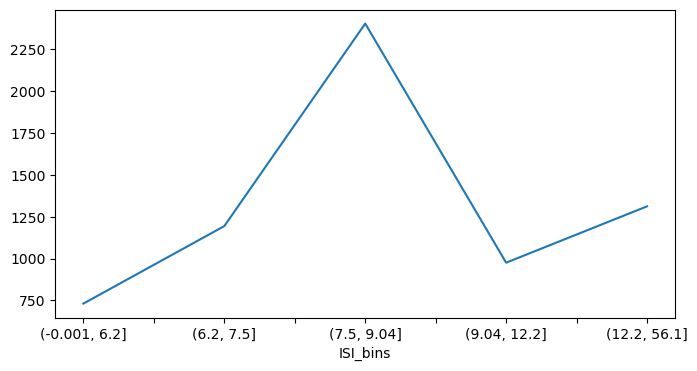

In [345]:
groupedby_ISIbins[('area', 'sum')].plot()

In [ ]:
redoing FFMC bins to match the

# Creating minimal, moderate, large fire spread

<Axes: >

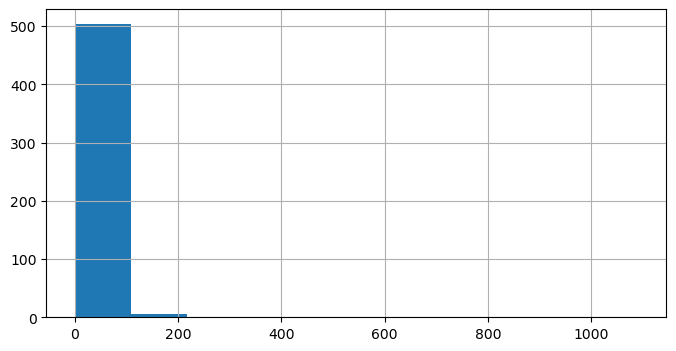

In [347]:
numerical_clean_data['area'].hist()

In [354]:
#numerical_clean_data['fire_spread']=pd.qcut(numerical_clean_data['area'],q=3)

#Trying to use qcut to have equallly sized bins, raised a duplicate edges error. Manually approximating the automatic bins
#ValueError: Bin edges must be unique: array([   0.  ,    0.  ,    3.4 , 1090.84]).

In [352]:
numerical_clean_data['fire_spread'].unique()

[(-0.001, 0.54], (0.54, 1090.84]]
Categories (2, interval[float64, right]): [(-0.001, 0.54] < (0.54, 1090.84]]

In [357]:
numerical_clean_data['area'][numerical_clean_data['area'] > 0.000000000].min()

0.09

In [430]:
bin_edges = [-0.01,0, 6,1100]
labels = ['minimal (0)', 'moderate (0.09to6)', 'large (6to_1100)']  # Define the labels for categories

# Create a new column with the categories
numerical_clean_data['fire_spread']=pd.cut(numerical_clean_data['area'], bins=bin_edges,labels=labels)

In [431]:
numerical_clean_data['fire_spread'].unique()

['minimal (0)', 'moderate (0.09to6)', 'large (6to_1100)']
Categories (3, object): ['minimal (0)' < 'moderate (0.09to6)' < 'large (6to_1100)']

In [393]:
numerical_clean_data['fire_spread'].value_counts()

(-0.01, 0.0]     244
(6.0, 1100.0]    138
(0.0, 6.0]       131
Name: fire_spread, dtype: int64

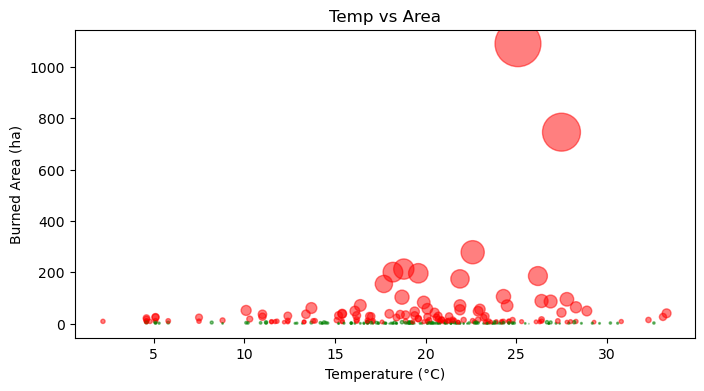

In [463]:
colors = {'large (6to_1100)': 'red', 'minimal (0)': 'blue', 'moderate (0.09to6)': 'green'}
x=numerical_clean_data['temp']
y=numerical_clean_data['area']
spread_bins=numerical_clean_data['fire_spread']
scatter = plt.scatter(x, y, label='map', c=spread_bins.map(colors), alpha=0.5, marker='o', s=area)
# Add axis labels
plt.xlabel('Temperature (°C)')
plt.ylabel('Burned Area (ha)')

# Add a colorbar for reference

# Add a title
plt.title('Temp vs Area')

# Display the plot
plt.show()

Text(0.5, 0.98, 'Area (ha) by month')

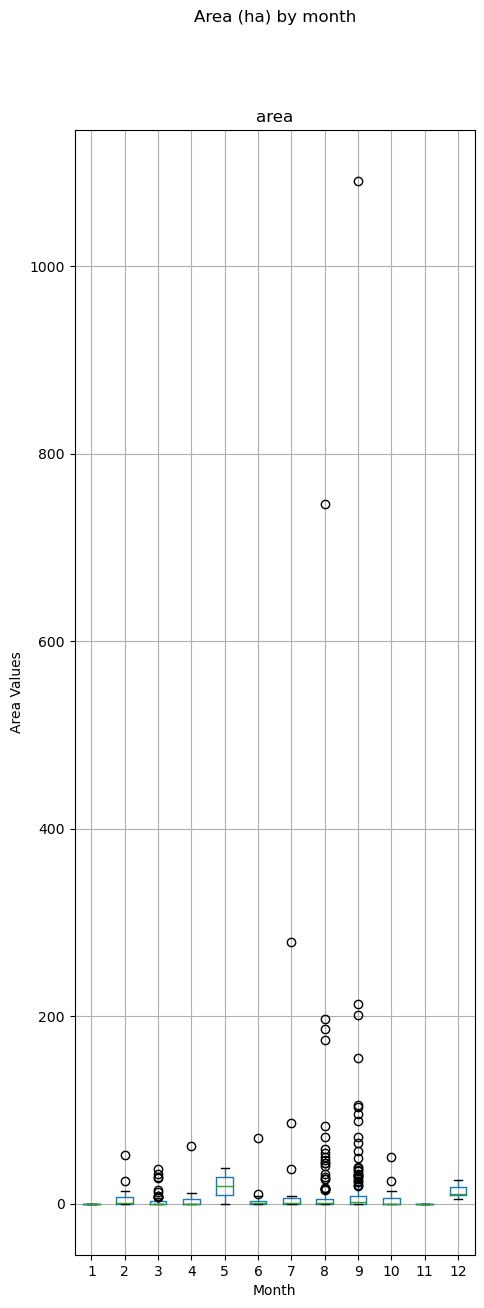

In [466]:
boxplot=numerical_clean_data.boxplot(column='area',by='month_num', figsize=(5, 15))

plt.xlabel('Month')
plt.ylabel('Area Values')
plt.suptitle('Area (ha) by month')

In [468]:
#we have a "levitating" box plot in month 5 and 12, what were the indexes
numerical_clean_data[numerical_clean_data['month_num']==5]

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain   area  month_num  \
304  6  5  85.1  28.0  113.8  3.5  11.3  94   4.9   0.0   0.00          5   
471  4  3  89.6  25.4   73.7  5.7  18.0  40   4.0   0.0  38.48          5   

     day_num FFMC_bins       ISI_bins       fire_spread  
304        5  (80, 90]  (-0.001, 6.2]       minimal (0)  
471        4  (80, 90]  (-0.001, 6.2]  large (6to_1100)

In [470]:
numerical_clean_data[numerical_clean_data['month_num']==12]

X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain   area  month_num  \
273  4  6  84.4  27.2  353.5  6.8   4.8  57   8.5   0.0   8.98         12   
274  8  6  84.0  27.8  354.6  5.3   5.1  61   8.0   0.0  11.19         12   
275  4  6  84.6  26.4  352.0  2.0   5.1  61   4.9   0.0   5.38         12   
276  4  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  17.85         12   
277  3  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  10.73         12   
278  4  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0  22.03         12   
279  4  4  85.4  25.4  349.7  2.6   4.6  21   8.5   0.0   9.77         12   
280  4  6  84.7  26.7  352.6  4.1   2.2  59   4.9   0.0   9.27         12   
281  6  5  85.4  25.4  349.7  2.6   5.1  24   8.5   0.0  24.77         12   

     day_num FFMC_bins       ISI_bins         fire_spread  
273        6  (80, 90]     (6.2, 7.5]    large (6to_1100)  
274        2  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
275        3  (80, 90]  (-0.001, 6.2]  moderate (0.09to6)  
276        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
277        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
278        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
279        0  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
280        4  (80, 90]  (-0.001, 6.2]    large (6to_1100)  
281        1  (80, 90]  (-0.001, 6.2]    large (6to_1100)

in month 12 very low temps but pretty large fires....
There appears to be one multiple fires on the same day (indexes are the same) perhaps due to christmas or NYE fireworks or other human activity?

Is this true for other big holidays like Easter or Carnival? in March/April? 

In [491]:

print(numerical_clean_data[numerical_clean_data['month_num'] == 3].nunique())
numerical_clean_data[numerical_clean_data['month_num'] == 3].shape

X               8
Y               5
FFMC           20
DMC            24
DC             24
ISI            23
temp           38
RH             31
wind           17
rain            2
area           19
month_num       1
day_num         7
FFMC_bins       3
ISI_bins        5
fire_spread     3
dtype: int64


(53, 16)

In [471]:
#DC is in the moderate range, but FFMC is above 80
numerical_clean_data['DC'].hist()

<Axes: >

In [474]:
numerical_clean_data['RH'].hist()

<Axes: >

What seems to predict a fire will be large?

Group by size cats

In [549]:
indexes_to_aggregate = ['FFMC', 'DMC', 'DC', 'ISI']

In [582]:
numerical_clean_data.groupby('fire_spread')[indexes_to_aggregate].agg(['mean','min', 'max','std','skew'])


FFMC                                         DMC  \
                         mean   min   max       std      skew        mean   
fire_spread                                                                 
minimal (0)         90.202869  18.7  96.2  7.007142 -6.273163  106.566393   
moderate (0.09to6)  91.234351  75.1  96.2  3.251953 -2.329338  114.890840   
large (6to_1100)    90.839130  63.5  96.1  4.110578 -2.781098  115.105797   

                                                             DC               \
                    min    max        std      skew        mean   min    max   
fire_spread                                                                    
minimal (0)         1.1  290.0  66.663841  0.592823  523.210246   7.9  855.3   
moderate (0.09to6)  3.2  291.3  54.641257  0.442044  586.769466  16.2  860.6   
large (6to_1100)    3.6  290.0  67.948994  0.566770  559.322464  15.3  855.3   

                                               ISI                       \
                           std      skew      mean  min   max       std   
fire_spread                                                               
minimal (0)         265.430772 -0.927620  8.848770  0.0  56.1  5.001962   
moderate (0.09to6)  216.100530 -1.491781  9.411450  1.9  22.7  4.099430   
large (6to_1100)    239.603775 -1.133002  8.964493  0.8  20.3  4.208885   

                              
                        skew  
fire_spread                   
minimal (0)         3.707382  
moderate (0.09to6)  0.780276  
large (6to_1100)    0.584370

In [556]:
numerical_clean_data.groupby('fire_spread')[indexes_to_aggregate].agg(['median','min', 'max','std','skew'])

FFMC                                     DMC              \
                   median   min   max       std      skew  median  min    max   
fire_spread                                                                     
minimal (0)          91.6  18.7  96.2  7.007142 -6.273163  102.75  1.1  290.0   
moderate (0.09to6)   91.8  75.1  96.2  3.251953 -2.329338  111.20  3.2  291.3   
large (6to_1100)     91.6  63.5  96.1  4.110578 -2.781098  118.45  3.6  290.0   

                                            DC                           \
                          std      skew median   min    max         std   
fire_spread                                                               
minimal (0)         66.663841  0.592823  661.3   7.9  855.3  265.430772   
moderate (0.09to6)  54.641257  0.442044  664.5  16.2  860.6  216.100530   
large (6to_1100)    67.948994  0.566770  665.6  15.3  855.3  239.603775   

                                ISI                                 
                        skew median  min   max       std      skew  
fire_spread                                                         
minimal (0)        -0.927620    8.4  0.0  56.1  5.001962  3.707382  
moderate (0.09to6) -1.491781    8.6  1.9  22.7  4.099430  0.780276  
large (6to_1100)   -1.133002    8.4  0.8  20.3  4.208885  0.584370

### FFMC
 - anything below 65 FFMC is a very low chance of spreading
 - 96 seems to be the "perfectly dry" rating for FFMC
 - the skew in FFMC goes down dramactically from minimal to mod
 - the average is nearly identical from min to large
 - no index seems to guarantee spread, ie the maximum FFMC is the same for all spread types
### DMC 
- huge range in DMC values that do not change across bins
- mean steps up notiably from 107 to 115 from mininmal to moderate
- median steps up at each bin level
- even skew across bins
- similar max across bins
### DC
-  max does not change across bins: 855-860 across bins
- skew is negative and similar across bins
- minor increase in mean going up bins
- negligible increase in median across bins
### ISI
- minimal variance in mean, median across bins

In [568]:
columns_to_boxplot = ['fire_spread','FFMC']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

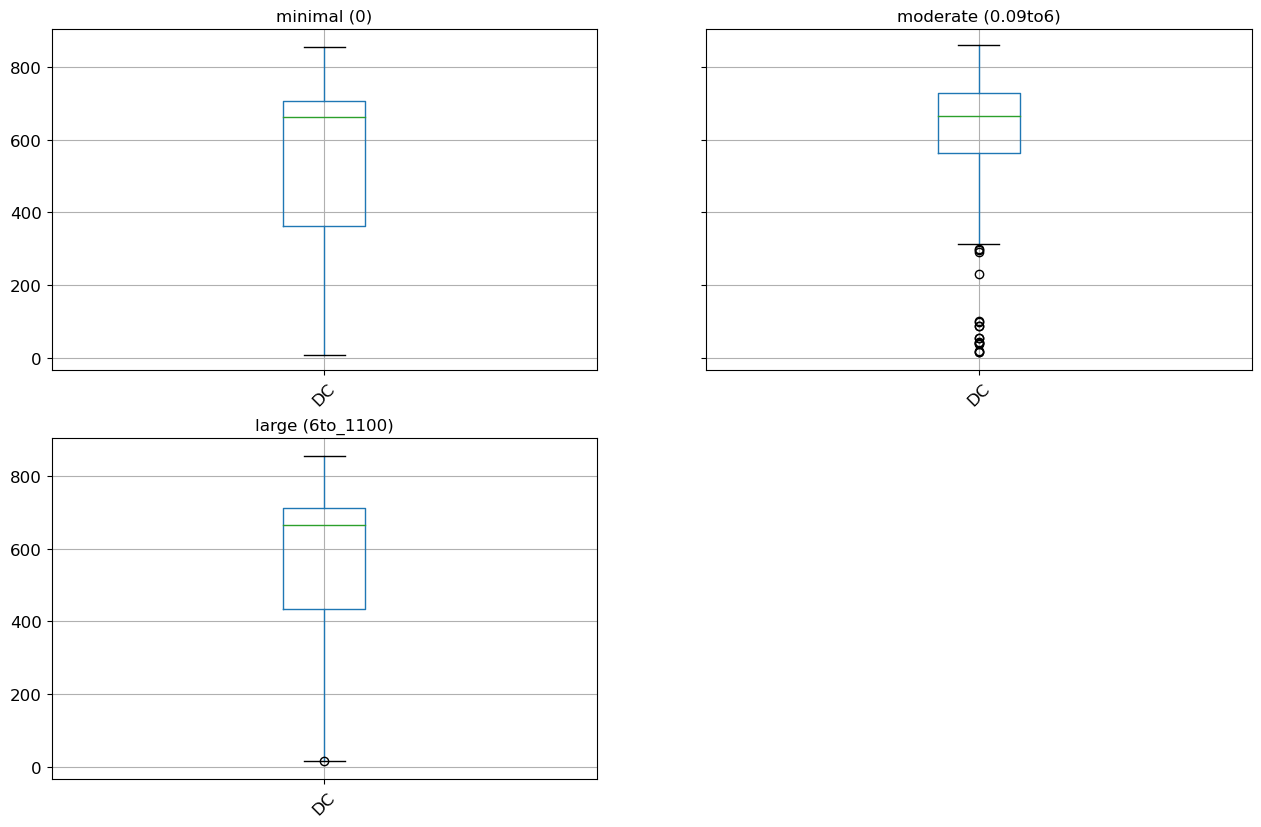

In [567]:
columns_to_boxplot = ['fire_spread','DC']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

In [569]:
columns_to_boxplot = ['fire_spread','DMC']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

In [573]:
columns_to_boxplot = ['fire_spread','ISI']
df = numerical_clean_data[columns_to_boxplot]
grouped = df.groupby('fire_spread')
grouped.boxplot(rot=45, fontsize=12, figsize=(15,10))  

minimal (0)                Axes(0.1,0.559091;0.363636x0.340909)
moderate (0.09to6)    Axes(0.536364,0.559091;0.363636x0.340909)
large (6to_1100)               Axes(0.1,0.15;0.363636x0.340909)
dtype: object

boxplot of DC by month

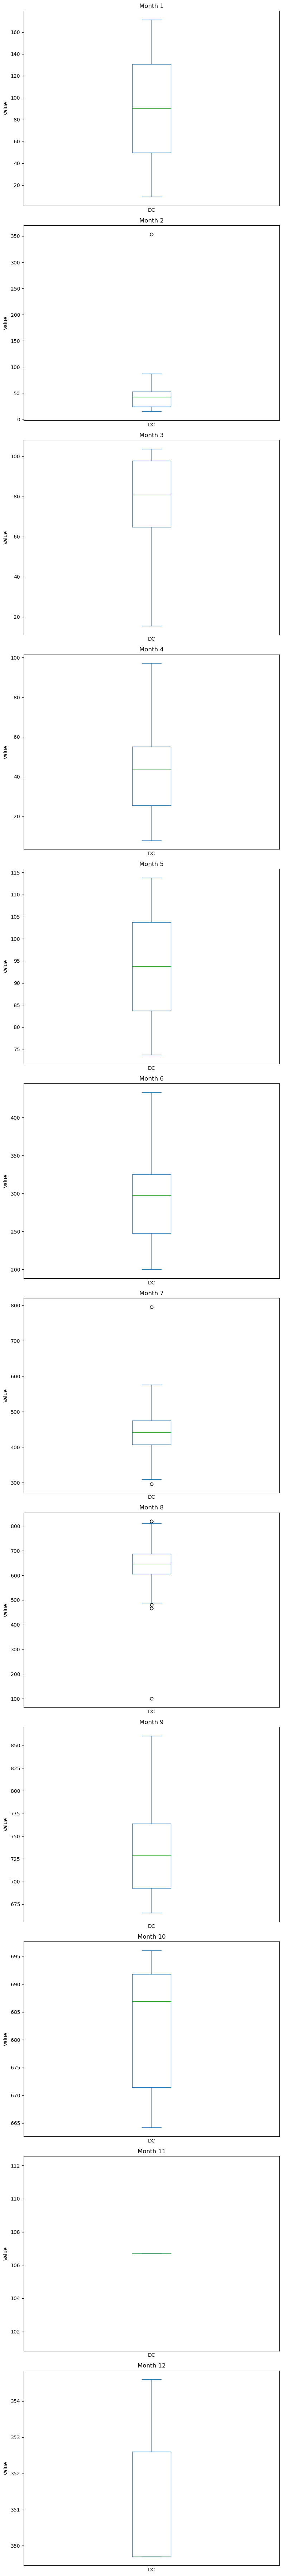

In [595]:
columns_to_boxplot = ['DC']
df = numerical_clean_data[columns_to_boxplot]

# Group by 'month_num' and create boxplots for 'DC'
grouped = df.groupby(numerical_clean_data['month_num'])

# Create subplots for each group
fig, axes = plt.subplots(nrows=len(grouped), ncols=1, figsize=(8, 6 * len(grouped)))

for (group, data), ax in zip(grouped, axes):
    data.plot(kind='box', ax=ax)
    ax.set_title(f'Month {group}')
    ax.set_xlabel('DC')
    ax.set_ylabel('Value')
    ax.set_xticks([])  # Remove x-axis ticks for clarity

plt.tight_layout()
plt.show()

In [643]:
by_month['fire_spread'].count().sort_values(ascending=True).plot.bar()


<Axes: xlabel='month_num'>

In [642]:
by_month['fire_spread'].count().sort_values(ascending=True)

month_num
11      1
1       2
5       2
4       9
12      9
10     15
6      16
2      20
7      32
3      53
9     172
8     182
Name: fire_spread, dtype: int64

In [618]:
type(data)

pandas.core.series.Series

In [624]:
data

fire_spread
month_num fire_spread                    
1         minimal (0)                   2
          moderate (0.09to6)            0
          large (6to_1100)              0
2         minimal (0)                  10
          large (6to_1100)              6
          moderate (0.09to6)            4
3         minimal (0)                  35
          large (6to_1100)             11
          moderate (0.09to6)            7
4         minimal (0)                   5
          moderate (0.09to6)            2
          large (6to_1100)              2
5         minimal (0)                   1
          large (6to_1100)              1
          moderate (0.09to6)            0
6         minimal (0)                   8
          moderate (0.09to6)            5
          large (6to_1100)              3
7         minimal (0)                  14
          moderate (0.09to6)            9
          large (6to_1100)              9
8         minimal (0)                  83
          moderate (0.09to6)           56
          large (6to_1100)             43
9         minimal (0)                  75
          large (6to_1100)             51
          moderate (0.09to6)           46
10        minimal (0)                  10
          large (6to_1100)              4
          moderate (0.09to6)            1
11        minimal (0)                   1
          moderate (0.09to6)            0
          large (6to_1100)              0
12        large (6to_1100)              8
          moderate (0.09to6)            1
          minimal (0)                   0

<Axes: xlabel='month_num'>

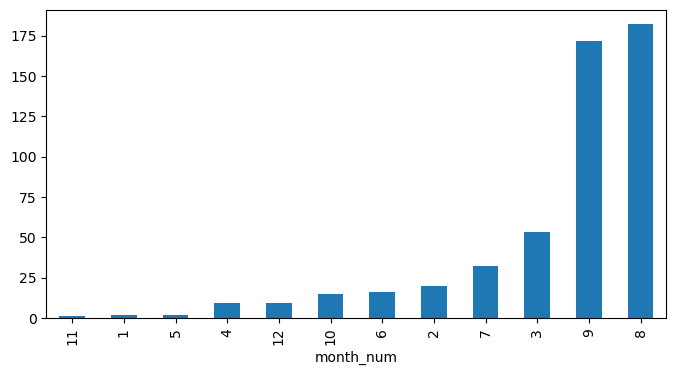

In [645]:
by_month['fire_spread'].count().sort_values(ascending=True).plot.bar()

In [647]:
numerical_clean_data.shape 

(513, 16)

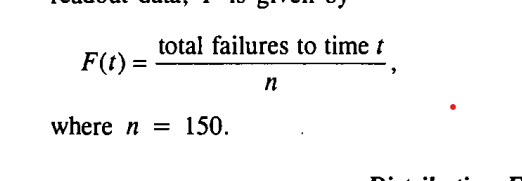

failures in this case being "large" fires

and time t is the month sorted by ascending value of large fire counts

In [ ]:
numerical_clean_data['F']=groupby('month_num')['fire_spread'].transform('count')

In [651]:
df = pd.DataFrame(data)

# Define the specific value to count
specific_value = 'large (6to_1100)'

# Define a custom counting function
def count_largefires(group):
    return (group == specific_value).sum()

# Calculate the count of the specific value within each group
numerical_clean_data['largefires_count'] = numerical_clean_data.groupby('month_num')['fire_spread'].transform(count_largefires)

numerical_clean_data

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_num  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          3   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         10   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         10   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          3   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          3   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          8   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          8   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          8   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          8   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         11   

     day_num  FFMC_bins       ISI_bins       fire_spread  largefires_count  
0          4   (80, 90]  (-0.001, 6.2]       minimal (0)                11  
1          1  (90, 100]     (6.2, 7.5]       minimal (0)                 4  
2          5  (90, 100]     (6.2, 7.5]       minimal (0)                 4  
3          4  (90, 100]    (7.5, 9.04]       minimal (0)                11  
4          6   (80, 90]   (9.04, 12.2]       minimal (0)                11  
..       ...        ...            ...               ...               ...  
512        6   (80, 90]  (-0.001, 6.2]  large (6to_1100)                43  
513        6   (80, 90]  (-0.001, 6.2]  large (6to_1100)                43  
514        6   (80, 90]  (-0.001, 6.2]  large (6to_1100)                43  
515        5  (90, 100]   (9.04, 12.2]       minimal (0)                43  
516        1   (70, 80]  (-0.001, 6.2]       minimal (0)                 0  

[513 rows x 17 columns]

In [652]:
numerical_clean_data['F']=numerical_clean_data['largefires_count']/513

In [658]:
numerical_clean_data['F'].hist()


<Axes: >

In [679]:
numerical_clean_data["month_f_count_rank"] = numerical_clean_data.groupby('month')['largefires_count'].rank(ascending=False)




KeyError: 'month'

In [675]:
numerical_clean_data["month_f_count_rank"].unique()

array([27. ,  8. , 91.5, 86.5,  5. ,  8.5, 16.5, 10.5,  1.5,  1. ])

In [678]:
numerical_clean_data['largefires_count'].dtype

dtype('int64')

In [680]:
clean_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num  
0            3        4  
1           10        1  
2           10        5  
3            3        4  
4            3        6  
..         ...      ...  
512          8        6  
513          8        6  
514          8        6  
515          8        5  
516         11        1  

[513 rows x 15 columns]

In [681]:
bin_edges = [-0.01,0, 6,1100]
labels = ['minimal (0)', 'moderate (0.09to6)', 'large (6to_1100)']  # Define the labels for categories

# Create a new column with the categories
clean_data['fire_spread']=pd.cut(clean_data['area'], bins=bin_edges,labels=labels)

C:\Users\user\AppData\Local\Temp\ipykernel_15096\2098230664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fire_spread']=pd.cut(clean_data['area'], bins=bin_edges,labels=labels)


In [682]:
clean_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num       fire_spread  
0            3        4       minimal (0)  
1           10        1       minimal (0)  
2           10        5       minimal (0)  
3            3        4       minimal (0)  
4            3        6       minimal (0)  
..         ...      ...               ...  
512          8        6  large (6to_1100)  
513          8        6  large (6to_1100)  
514          8        6  large (6to_1100)  
515          8        5       minimal (0)  
516         11        1       minimal (0)  

[513 rows x 16 columns]

In [683]:
specific_value = 'large (6to_1100)'

# Define a custom counting function
def count_largefires(group):
    return (group == specific_value).sum()

# Calculate the count of the specific value within each group
clean_data['largefires_count'] = clean_data.groupby('month_num')['fire_spread'].transform(count_largefires)

clean_data

C:\Users\user\AppData\Local\Temp\ipykernel_15096\76427931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['largefires_count'] = clean_data.groupby('month_num')['fire_spread'].transform(count_largefires)


X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num       fire_spread  largefires_count  
0            3        4       minimal (0)                11  
1           10        1       minimal (0)                 4  
2           10        5       minimal (0)                 4  
3            3        4       minimal (0)                11  
4            3        6       minimal (0)                11  
..         ...      ...               ...               ...  
512          8        6  large (6to_1100)                43  
513          8        6  large (6to_1100)                43  
514          8        6  large (6to_1100)                43  
515          8        5       minimal (0)                43  
516         11        1       minimal (0)                 0  

[513 rows x 17 columns]

In [684]:
clean_data["month_f_count_rank"] = clean_data.groupby('month')['largefires_count'].rank(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_15096\2663516386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["month_f_count_rank"] = clean_data.groupby('month')['largefires_count'].rank(ascending=False)


In [694]:
clean_data.drop('month_f_count_rank', axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15096\3683883980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop('month_f_count_rank', axis=1, inplace=True)


In [695]:
clean_data

X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num       fire_spread  largefires_count  
0            3        4       minimal (0)                11  
1           10        1       minimal (0)                 4  
2           10        5       minimal (0)                 4  
3            3        4       minimal (0)                11  
4            3        6       minimal (0)                11  
..         ...      ...               ...               ...  
512          8        6  large (6to_1100)                43  
513          8        6  large (6to_1100)                43  
514          8        6  large (6to_1100)                43  
515          8        5       minimal (0)                43  
516         11        1       minimal (0)                 0  

[513 rows x 17 columns]

In [696]:
numerical_clean_data

X  Y  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  month_num  \
0    7  5  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00          3   
1    7  4  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         10   
2    7  4  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         10   
3    8  6  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00          3   
4    8  6  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00          3   
..  .. ..   ...    ...    ...   ...   ...  ..   ...   ...    ...        ...   
512  4  3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44          8   
513  2  4  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29          8   
514  7  4  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16          8   
515  1  4  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00          8   
516  6  3  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         11   

     day_num  FFMC_bins       ISI_bins       fire_spread  largefires_count  \
0          4   (80, 90]  (-0.001, 6.2]       minimal (0)                11   
1          1  (90, 100]     (6.2, 7.5]       minimal (0)                 4   
2          5  (90, 100]     (6.2, 7.5]       minimal (0)                 4   
3          4  (90, 100]    (7.5, 9.04]       minimal (0)                11   
4          6   (80, 90]   (9.04, 12.2]       minimal (0)                11   
..       ...        ...            ...               ...               ...   
512        6   (80, 90]  (-0.001, 6.2]  large (6to_1100)                43   
513        6   (80, 90]  (-0.001, 6.2]  large (6to_1100)                43   
514        6   (80, 90]  (-0.001, 6.2]  large (6to_1100)                43   
515        5  (90, 100]   (9.04, 12.2]       minimal (0)                43   
516        1   (70, 80]  (-0.001, 6.2]       minimal (0)                 0   

            F  month_f_count_rank  
0    0.021442                27.0  
1    0.007797                 8.0  
2    0.007797                 8.0  
3    0.021442                27.0  
4    0.021442                27.0  
..        ...                 ...  
512  0.083821                91.5  
513  0.083821                91.5  
514  0.083821                91.5  
515  0.083821                91.5  
516  0.000000                 1.0  

[513 rows x 19 columns]

In [697]:
df = numerical_clean_data

# Create a scatter plot of 'F' against 'month_num'
plt.scatter(df['month_num'], df['F'])

# Add labels and a title
plt.xlabel('Month Number')
plt.ylabel('F')
plt.title('Scatter Plot of F vs. Month Number')

# Show the plot
plt.show()

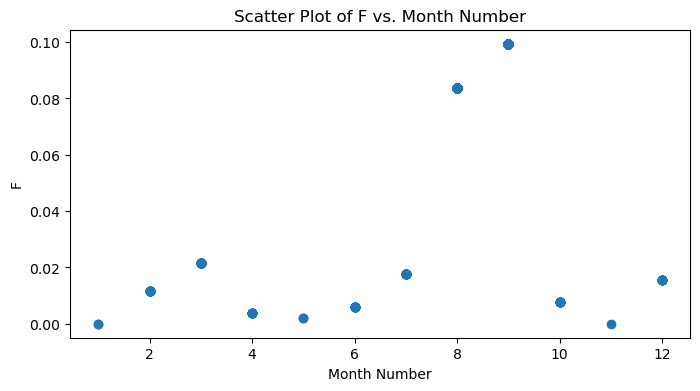

In [701]:
custom_order = [11,1,5,4,12,10,6,2,7,3,9,8]

# Convert 'month_num' to a categorical data type with the custom order
df['month_num'] = pd.Categorical(df['month_num'], categories=custom_order, ordered=True)

# Sort the DataFrame by the categorical 'month_num' column


# Create a scatter plot of 'F' against 'month_num'
plt.scatter(df['month_num'], df['F'])

# Add labels and a title
plt.xlabel('Month Number')
plt.ylabel('F')
plt.title('Scatter Plot of F vs. Month Number')

# Show the plot
plt.show()